# Computational Illustration for Chapter 06: Regression and Regularization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import warnings
warnings.filterwarnings('ignore')

In [2]:
# generate the data

m = 15
x = 2*np.random.uniform(0,1,(m,1))-1
x.sort
y = x**3 - 4*x**2 + x + np.random.normal(0,1,(m,1))
x_over = x.flatten()

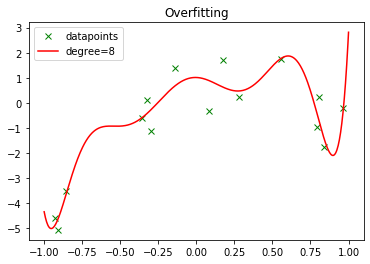

In [3]:
# Overfitting with polynomial of high degree
deg = 8
p_over = np.polyfit(x_over, y, deg)
p_over = p_over.flatten()
grid = np.linspace(-1,1,500)
poly_over = np.poly1d(p_over)
plt.plot(x,y,'gx',grid,poly_over(grid),'r-')
plt.legend(labels=['datapoints','degree={}'.format(deg)],loc='best')
plt.title('Overfitting')
plt.show()

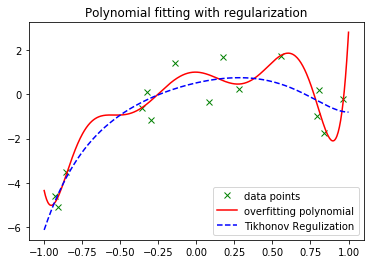

In [4]:
# Tikhonov Regularization
X = np.zeros((len(x),deg+1))
for i in range(deg+1):
    X[:,i] = x_over**(i)
    
n = np.size(X,1)
lamb = 0.1;   # lambda is an important parameter
w_tik = LA.multi_dot([LA.inv(LA.multi_dot([np.transpose(X),X])+lamb*np.identity(n)),np.transpose(X),y])
w_tik = w_tik[::-1]
w_tik = w_tik.flatten()
poly_tik = np.poly1d(w_tik)
plt.plot(x,y,'gx',grid,poly_over(grid),'r-',grid,poly_tik(grid),'b--')
plt.legend(labels=['data points','overfitting polynomial','Tikhonov Regulization'])
plt.title('Polynomial fitting with regularization')
plt.show()

In [5]:
# LASSO

vec = lamb*np.ones((1,n))
Q = np.row_stack( (np.column_stack((X,-X)) , np.column_stack((vec,vec))) )
A = LA.multi_dot([np.transpose(Q),Q])
y_new = np.row_stack((y,0))
b = -2*LA.multi_dot([np.transpose(Q),y_new])
normb = np.array(LA.multi_dot([np.transpose(b),b] ))
b = b.flatten()

import gurobipy as gp
from gurobipy import GRB
lasso = gp.Model("lasso")
lasso.setParam('OutputFlag',False)
wpm_lasso = lasso.addMVar(2*n,lb=0, ub=GRB.INFINITY)
lasso.setMObjective ( A, b, normb, xQ_L=wpm_lasso, xQ_R=wpm_lasso, xc=wpm_lasso, sense=GRB.MINIMIZE )
lasso.optimize()


Using license file /Users/liaochunyang/gurobi.lic


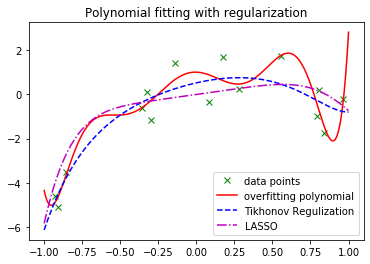

The number of non-zero coefficient is  6


In [6]:
w_lasso = wpm_lasso.X[0:n]-wpm_lasso.X[n:2*n]
poly_lasso = np.poly1d(w_lasso)
plt.plot(x,y,'gx',grid,poly_over(grid),'r-',grid,poly_tik(grid),'b--',grid,poly_lasso(grid),'m-.')
plt.legend(labels=['data points','overfitting polynomial','Tikhonov Regulization','LASSO'])
plt.title('Polynomial fitting with regularization')
plt.show()
# Check sparsity
print('The number of non-zero coefficient is ',sum(abs(w_lasso)>1e-5))
